# basic-004
https://chatgpt.com/c/6804748b-8800-800a-8422-35b642281b70

In [2]:
# 📦 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [4]:
# 📁 2. Load Datasets
full_data = pd.read_csv('../datasets/XAGUSD-H1-rates.csv', sep=r'\s+')
latest_30 = pd.read_csv('../datasets/new-data-for-test/rows-30-from-20240503.csv', sep=r'\s+')

In [6]:
# 🧹 3. Preprocessing
# Drop unnecessary columns
columns_to_use = ['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<TICKVOL>']
full_data = full_data[columns_to_use]
latest_30 = latest_30[columns_to_use]

In [7]:
# Normalize the data
scaler = MinMaxScaler()
scaled_full = scaler.fit_transform(full_data)
scaled_latest_30 = scaler.transform(latest_30)

In [8]:
# 🪜 4. Create sequences
def create_sequences(data, input_steps=30, output_steps=100):
    X, y = [], []
    for i in range(len(data) - input_steps - output_steps):
        X.append(data[i:i+input_steps])
        y.append(data[i+input_steps:i+input_steps+output_steps])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_full, input_steps=30, output_steps=100)

In [9]:
# 🧪 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from tensorflow.keras.layers import TimeDistributed, RepeatVector

# 🧠 6. Build the Encoder-Decoder LSTM Model
model = Sequential([
    LSTM(128, input_shape=(30, len(columns_to_use))),  # encoder outputs a vector
    RepeatVector(100),  # repeat the context vector 100 times
    LSTM(64, return_sequences=True),  # decoder that outputs 100 steps
    Dropout(0.2),
    TimeDistributed(Dense(len(columns_to_use)))  # output shape: (None, 100, 5)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

/home/saeed/repozitories/machine-learning/tensorflow-course/start-tensorflow/envs/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 128)            │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 100, 5)         │           325 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,341 (462.27 KB)

 Trainable params: 118,341 (462.27 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# 🚂 7. Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10


2025-04-20 08:08:58.752924: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 79130000 exceeds 10% of free system memory.


619/619 ━━━━━━━━━━━━━━━━━━━━ 149s 229ms/step - loss: 0.0104 - val_loss: 0.0011
Epoch 2/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 133s 215ms/step - loss: 0.0021 - val_loss: 0.0010
Epoch 3/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 129s 209ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 4/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 124s 200ms/step - loss: 0.0015 - val_loss: 9.9294e-04
Epoch 5/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 126s 203ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 6/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 132s 213ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 7/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 134s 217ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 8/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 133s 214ms/step - loss: 0.0013 - val_loss: 9.8519e-04
Epoch 9/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 125s 203ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 10/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 141s 228ms/step - loss: 0.0012 - val_loss: 9.7787e-04


In [16]:
# 🔮 8. Predict Next 100 Candles Using latest_30
latest_30_input = np.expand_dims(scaled_latest_30, axis=0)  # shape: (1, 30, features)
predicted_100 = model.predict(latest_30_input)[0]  # shape: (100, features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [17]:
# 🔄 9. Inverse scale predictions to original values
combined = np.concatenate([scaled_latest_30, predicted_100], axis=0)
combined_inversed = scaler.inverse_transform(combined)
real_30 = combined_inversed[:30]
pred_100 = combined_inversed[30:]

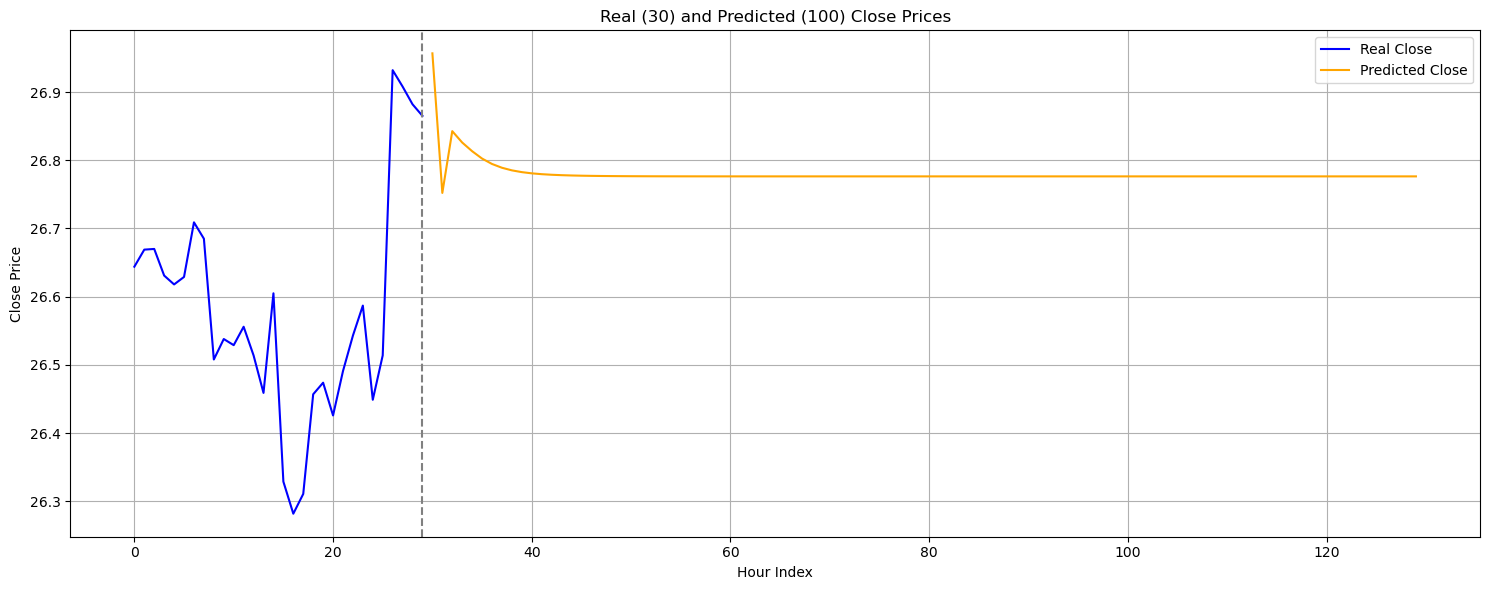

In [18]:
# 📊 10. Plot 130 candles (30 real + 100 predicted)
plt.figure(figsize=(15, 6))
plt.plot(range(30), real_30[:, 3], label='Real Close', color='blue')      # Close price is index 3
plt.plot(range(30, 130), pred_100[:, 3], label='Predicted Close', color='orange')
plt.axvline(29, color='gray', linestyle='--')
plt.title('Real (30) and Predicted (100) Close Prices')
plt.xlabel('Hour Index')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
